In [1]:
import pandas as pd
donnee = pd.read_pickle("C:/Users/IFDU1270/Desktop/PASSE PRO/casplatfore.pkl")

In [4]:
donnee.head(3)

,f1,kn_individu_national,dc_individu_national,top_dsn,top_djtp,dc_assedic_de,duree_vie_mois_etab_cess,dn_mtcapitalodcourante,dn_nbetabrattachesentreprise,dn_nbjourscarenceiccp,...,RDFprobbissanscsp,cas,BNI,DAL,DE déjà signalé par une autre source de signalement,Statut OCAPI,Signalement crée dans Sillage,Qualité des données,Commentaires,Qualification SILLAGE ( à compléter à l'issu des investigations)
0,0,1000000125,1000000125,Présence DSN,Absence DJTP,51,262,4829.37,1,0,...,0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000000136,1000000136,Absence DSN,Absence DJTP,51,749,17776.11,0,10,...,0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000000979,1000000979,Présence DSN,Présence DJTP,51,749,28185.30,1,0,...,0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Comparaison des cas positifs rdf sans pcs et rdf avec pcs
On compare les cas positifs que les modèles de random forest avec CSP et sans CSP ramènent. La variable qui modélise le score du modèle RDF avec CSP est <b>rdfscore</b>. La variable qui modélise le score du modèle RDF sans CSP est RDFprobsanscsp.

In [15]:
# Nombre de cas positif RDF avec CSP
nb_cas_pos_rdf_csp = donnee.loc[donnee['rdfscore']>50].shape[0]
print(f'Le nombre de cas positif du modèle RDF avec CSP est:{nb_cas_pos_rdf_csp} ')

#Nombre de cas posti

Le nombre de cas positif du modèle RDF avec CSP est:5427 


In [16]:
# Nombre de cas positif RDF sans CSP
nb_cas_pos_rdf_sanscsp = donnee.loc[donnee['RDFprobsanscsp']>0.5].shape[0]
print(f'Le nombre de cas positif du modèle RDF avec CSP est:{nb_cas_pos_rdf_sanscsp} ')

Le nombre de cas positif du modèle RDF avec CSP est:5562 


Cohérence entre les 2 modèles. On regarde si globalement les modèles sont en accord sur les cas négatif et les cas positif.

In [19]:
donnee['pos_csp'] = donnee['rdfscore'].apply(lambda x: 'pos_csp' if x>50 else 'neg_csp')
donnee['pos_sanscsp'] = donnee['RDFprobsanscsp'].apply(lambda x: 'pos_cspsanscsp' if x>0.5 else 'neg_sanscsp')

In [27]:
compas = donnee.groupby(['pos_csp','pos_sanscsp']).agg({'kn_individu_national':'count'}).reset_index()
donnee.groupby(['pos_csp','pos_sanscsp']).agg({'kn_individu_national':'count'}).reset_index()

,pos_csp,pos_sanscsp,kn_individu_national
0,neg_csp,neg_sanscsp,2006083
1,neg_csp,pos_cspsanscsp,1358
2,pos_csp,neg_sanscsp,1223
3,pos_csp,pos_cspsanscsp,4204


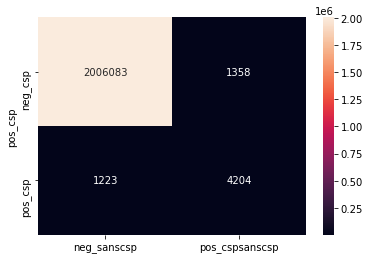

In [44]:
import seaborn as sns
oo = compas.pivot_table(index=['pos_csp'],columns='pos_sanscsp')
oo.columns = ['neg_sanscsp','pos_cspsanscsp']
sns.heatmap(oo,annot=True,fmt="d")

* 2006083 dossiers sont vue comme négatif par les 2 modèles
* 1358 cas sont négatifs pour le modèles csp et postif pour le modèle sans csp
* 1223 cas sont positif pour le modèle csp et négatif pour le modèle sans csp
* 4204 dossiers sont vue comme frauduleux par les 2 modèles

# Nombre de cas CSP détecté par les 2 modèles

In [64]:
import numpy as np

fct_csp1 = ["Rupture d'un commun accord pour entrée en CSP","Entrée en CSP suite adhésion volontaire"]
fct_csp2 = ["Rupture d'un commun accord pour entrÃ©e en CSP",'EntrÃ©e en CSP suite adhÃ©sion volontaire']

fct_csp = fct_csp1+fct_csp2


#le nombre de cas CSP dans la pop
nb_cas_csp = donnee.loc[donnee['DC_LBLMOTIFFCT_RETENU'.lower()].isin(fct_csp)].shape[0]

#Nombre de cas csp positif produit par le modèle RDF avec CSP
nb_cas_csp_rdf_aveccsp = donnee.loc[(donnee['DC_LBLMOTIFFCT_RETENU'.lower()].isin(fct_csp))& (donnee['rdfscore']>50)].shape[0]

#Nombre de cas csp positif produit par le modèle RDF sans CSP
nb_cas_csp_rdf_sanscsp = donnee.loc[(donnee['DC_LBLMOTIFFCT_RETENU'.lower()].isin(fct_csp))& (donnee['RDFprobsanscsp']>0.5)].shape[0]

#Ratio de cas csp avec la RDF CSP
ratio_csp = np.round(nb_cas_csp_rdf_aveccsp/nb_cas_csp,2)

#Ratio de cas csp avec la RDF sans CSP
ratio_sanscsp = np.round(nb_cas_csp_rdf_sanscsp/nb_cas_csp,2)

In [70]:
print(f'Nombre de cas CSP:{nb_cas_csp}')
print(f'Nombre de cas CSP RDF avec CSP:{nb_cas_csp_rdf_aveccsp}')
print(f'Nombre de cas CSP RDF sans CSP:{nb_cas_csp_rdf_sanscsp}')
print(f'Ratio modèle avec CSP:{ratio_csp}')
print(f'Ratio modèle sans CSP:{ratio_sanscsp}')

Nombre de cas CSP:113171
Nombre de cas CSP RDF avec CSP:3160
Nombre de cas CSP RDF sans CSP:2953
Ratio modèle avec CSP:0.03
Ratio modèle sans CSP:0.03


Le nombre de cas ramené par le modèle initiale prenant en compte les cas CSP s’élève à 3160 contre 2953 pour le modèle antrainé sans les cas CSP. L’écart en faveur du modèle entrainé sans les cas CSP n’est pas suffisamment grand pour être significatif.

# Perspectives :
* Utiliser le modèle initiale testé lors des plateformes. Pour les cas CSP prendre les cas ayant un score supérieur à un seuil
* Faire un modèle spécifique pour les CSP. Faire un modèle spécifique pour les CSP. Nous risquons sur un court terme ne pas avoir assez de cas CSP positif pour l’élaboration d’un tel modèle 